import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [3]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [5]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [6]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [7]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [17]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/57

make measure image

In [9]:
def_img = io.imread("image\\10.22.2020 Heptane-40%water60%ethanol\\frame 6\\3-40-59 PM\\10.22.2020 (6) 1445.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

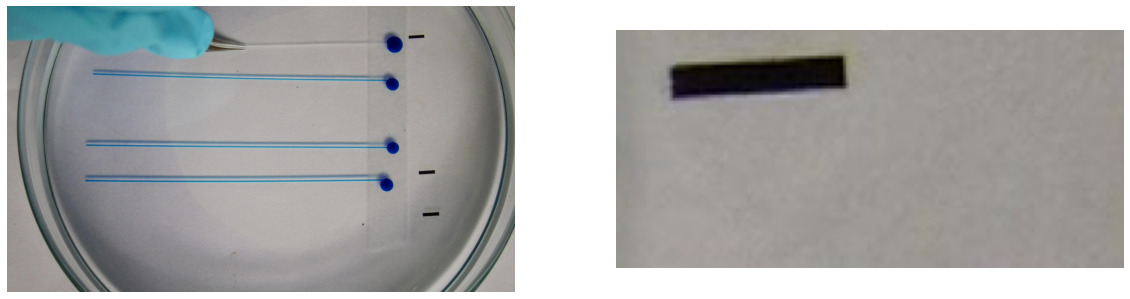

In [14]:
measure_im = crop(def_img, ((100, 900), (1500, 250), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

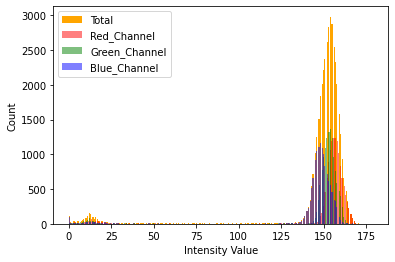

In [15]:
plot_histogram(measure_im)

[18, 19]
[17, 76]


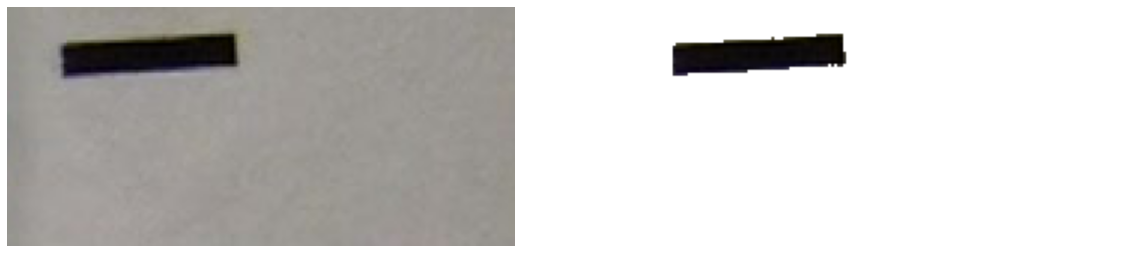

length of picture is  57.0087712549569 pixel


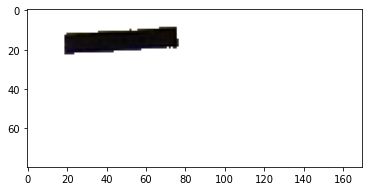

In [16]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

57 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 57


find definition length on first picture

(1080, 1920, 3) (90, 580, 3)


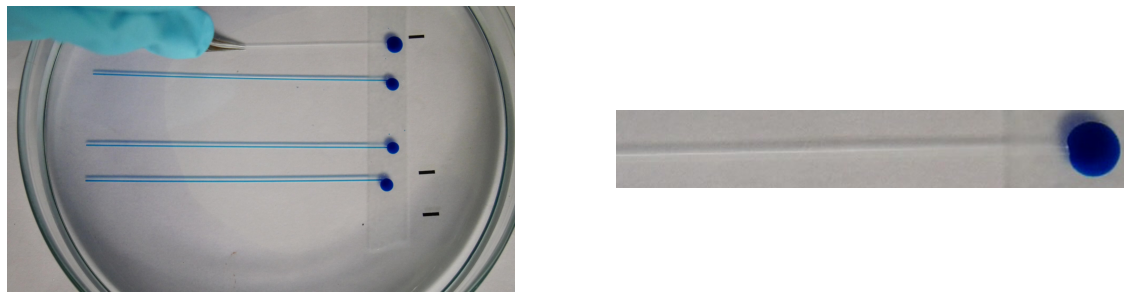

In [31]:
def_crop_im = crop(def_img, ((100, 890), (920, 420), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

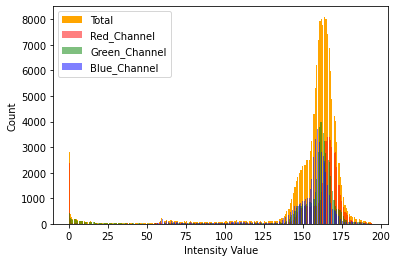

In [32]:
plot_histogram(def_crop_im)

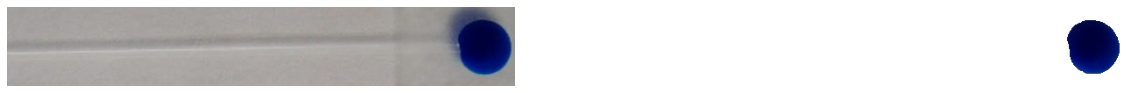

In [33]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[37, 515]
[47, 574]
ldef  59.841457201508724 pixel


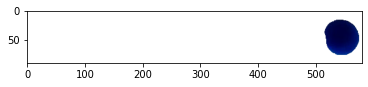

In [34]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1445 to 1597

In [35]:
number_of_picture = 1445
thresh = 45
template1 = []
l_def = 59.841457201508724
#1597-1445 = 152
for i in range(153):  
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 6\\3-40-59 PM\\10.22.2020 (6) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((100, 890), (920, 420), (0,0)), copy=False)
    thresh_image = thresholding(thresh,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template1.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)
    # for i in range(len(template1)/2):
    #     if(template1[i] > 70):


In [36]:
print(template1)
print(len(template1))

[0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 7, 9, 10, 13, 14, 16, 17, 20, 22, 24, 26, 27, 28, 30, 32, 33, 34, 37, 38, 39, 44, 44, 43, 44, 46, 49, 51, 52, 55, 57, 59, 60, 62, 63, 66, 67, 68, 70, 70, 72, 75, 75, 77, 78, 79, 81, 84, 85, 86, 87, 91, 91, 94, 92, 93, 97, 97, 100, 102, 103, 107, 105, 107, 110, 111, 113, 114, 115, 116, 118, 118, 123, 123, 123, 126, 126, 129, 130, 131, 132, 133, 135, 139, 139, 140, 141, 143, 144, 143, 146, 144, 150, 151, 152, 150, 155, 156, 159, 160, 160, 160, 162, 164, 166, 166, 171, 171, 173, 174, 176, 177, 178, 179, 180, 182, 183, 184, 186, 185, 187, 188, 190, 191, 193, 193, 196, 197, 197, 198, 199, 201, 202, 203, 204, 205, 207, 209, 208, 210, 212, 213, 213, 211]
153


find length on crop value 2 from 1598 to 2557

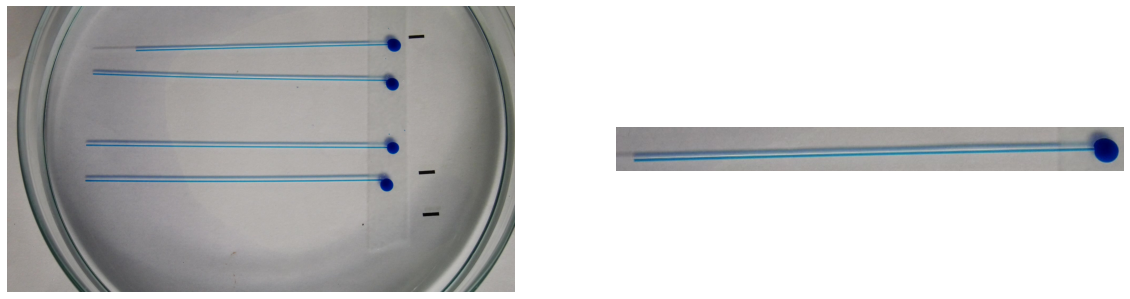

In [42]:
image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 6\\3-40-59 PM\\10.22.2020 (6) " + str(2557).zfill(4) + ".jpg" )
crop_image = crop(image, ((100, 890), (450, 420), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [49]:
number_of_picture = 1598
thresh = 45
template2 = []
l_def = 59.841457201508724
#2557-1598 = 959
for i in range(960):
    image = mpimg.imread( "image\\10.22.2020 Heptane-40%water60%ethanol\\frame 6\\3-40-59 PM\\10.22.2020 (6) " + str(number_of_picture + i).zfill(4) + ".jpg" )
    crop_image = crop(image, ((100, 890), (450, 420), (0,0)), copy=False)
    # if(True):
    thresh_image = thresholding(thresh,crop_image)
    # else:
    #     thresh_image = thresholding(40,crop_image)
    # plot_compare_img(crop_image,thresh_image)
    # print(i)
    length = find_length(thresh_image,False)
    length = length - l_def
    length = int(length)
    template2.append(length)
    # print(i, length)
    # plt.figure()
    # plt.imshow(thresh_image)

In [50]:
print(template2)
print(len(template2))

[214, 215, 218, 218, 220, 218, 220, 221, 221, 222, 223, 234, 233, 235, 236, 237, 239, 237, 240, 243, 243, 245, 244, 244, 245, 250, 250, 252, 253, 254, 254, 257, 258, 258, 259, 263, 263, 265, 266, 266, 268, 268, 268, 269, 273, 273, 274, 275, 276, 278, 279, 282, 281, 281, 282, 283, 284, 286, 288, 290, 290, 292, 293, 293, 295, 296, 295, 297, 297, 300, 301, 301, 303, 304, 305, 303, 305, 306, 311, 311, 313, 313, 314, 317, 316, 318, 319, 319, 321, 322, 321, 325, 325, 328, 329, 329, 329, 330, 330, 331, 333, 335, 334, 335, 337, 339, 340, 342, 343, 345, 345, 345, 346, 347, 348, 350, 351, 351, 353, 353, 354, 356, 357, 357, 359, 361, 361, 361, 361, 363, 364, 365, 365, 367, 368, 369, 370, 370, 372, 373, 372, 375, 377, 377, 377, 377, 377, 378, 380, 382, 383, 385, 385, 386, 386, 388, 390, 391, 391, 391, 391, 391, 392, 391, 392, 396, 398, 400, 398, 400, 395, 401, 403, 403, 403, 401, 404, 405, 409, 410, 409, 411, 412, 413, 415, 416, 416, 416, 417, 419, 420, 420, 420, 424, 424, 424, 425, 424, 425, 428,

concat 2 template and calculate pixel to centimeter

In [51]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [52]:
print(l_array)

[0.       0.       0.       ... 8.22807  8.22807  8.236842]


export data to exel

In [53]:
import pandas as pd

In [54]:
print(len(l_array))

1113


In [55]:
data = []
num_img = 1445
for i in range(len(l_array)):
    data.append(( " 10.22.2020 (6) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-40-60(6)_10.22.2020_3-40-59-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


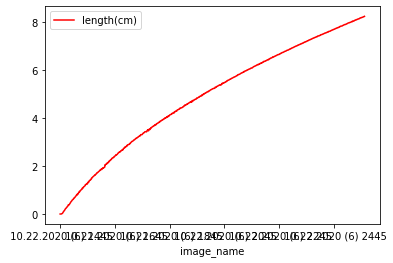

In [56]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()